<a href="https://colab.research.google.com/github/Dikshita379/Retail-Market-Basket-Analysis/blob/main/Retail_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [20]:
from google.colab import files
uploaded = files.upload()


Saving groceries - groceries.csv to groceries - groceries (1).csv


In [21]:
import pandas as pd

# Load CSV
df = pd.read_csv("groceries - groceries.csv")

# Check first 5 rows
print(df.head())


   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN 

In [22]:
print(df.head())
print(df.columns)


   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN 

In [23]:
# Drop NA values and convert each row into a list of items
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Example: [['citrus fruit', 'semi-finished bread', 'margarine'], ['tropical fruit', 'yogurt', 'coffee'], ...]
print(transactions[:5])


[[4, 'citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], [3, 'tropical fruit', 'yogurt', 'coffee'], [1, 'whole milk'], [4, 'pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], [4, 'other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]


In [24]:
# Convert each row into a list of products (drop NaN and convert to string)
transactions = df.apply(lambda row: row.dropna().astype(str).tolist(), axis=1).tolist()

# Preview first few transactions
print(transactions[:5])


[['4', 'citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['3', 'tropical fruit', 'yogurt', 'coffee'], ['1', 'whole milk'], ['4', 'pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['4', 'other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]


In [26]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transactions into one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(frequent_itemsets.head())
print(rules.head())


    support itemsets
0  0.219522      (1)
1  0.025013     (10)
2  0.018505     (11)
3  0.011896     (12)
4  0.167056      (2)
          antecedents         consequents  antecedent support  \
0                 (1)       (canned beer)            0.219522   
1       (canned beer)                 (1)            0.077682   
2                (10)  (other vegetables)            0.025013   
3  (other vegetables)                (10)            0.193493   
4                (10)        (whole milk)            0.025013   

   consequent support   support  confidence      lift  representativity  \
0            0.077682  0.026436    0.120426  1.550250               1.0   
1            0.219522  0.026436    0.340314  1.550250               1.0   
2            0.193493  0.010778    0.430894  2.226929               1.0   
3            0.025013  0.010778    0.055702  2.226929               1.0   
4            0.255516  0.011896    0.475610  1.861370               1.0   

   leverage  conviction  zhangs_

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [12]:
plt.figure(figsize=(10,6))
frequent_itemsets['item_count'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
top_items = (frequent_itemsets[frequent_itemsets['item_count']==1]
             .sort_values(by="support", ascending=False)
             .head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

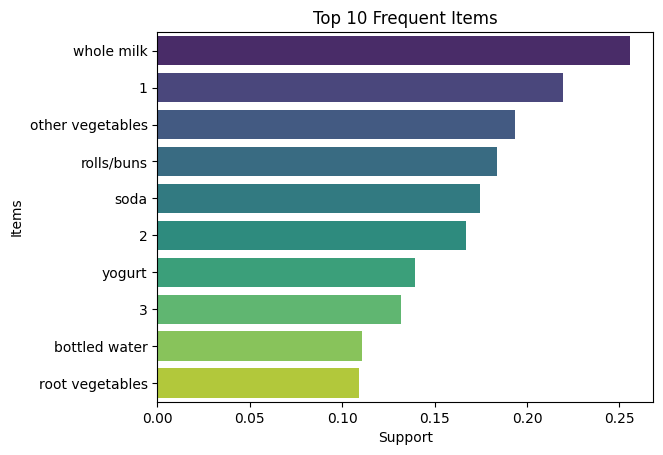

In [28]:
sns.barplot(x="support", y=top_items['itemsets'].apply(lambda x: list(x)[0]), data=top_items, palette="viridis")
plt.title("Top 10 Frequent Items")
plt.xlabel("Support")
plt.ylabel("Items")
plt.show()

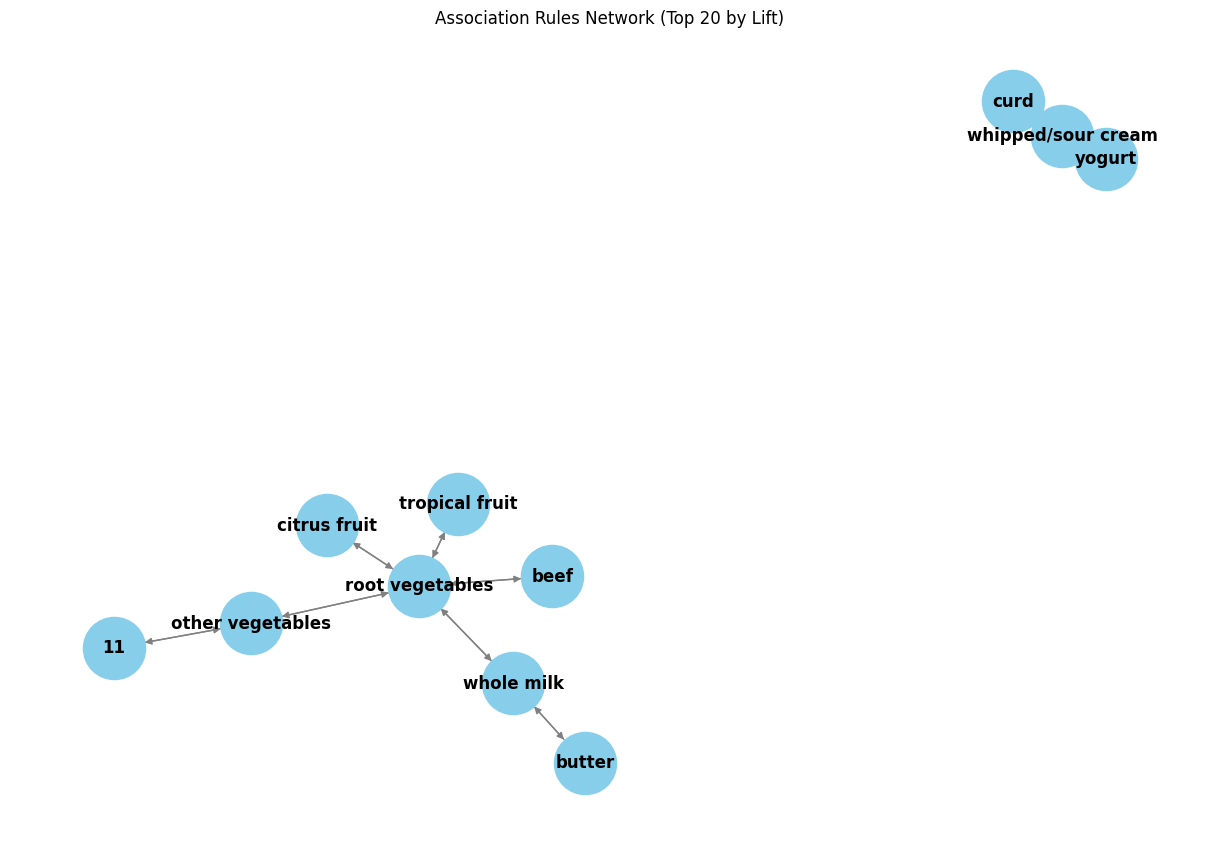

In [29]:
# Take only top 20 rules for clarity
top_rules = rules.sort_values("lift", ascending=False).head(20)

G = nx.DiGraph()

for _, row in top_rules.iterrows():
    frozenset_left = list(row['antecedents'])
    frozenset_right = list(row['consequents'])
    G.add_node(frozenset_left[0], color='lightblue')
    G.add_node(frozenset_right[0], color='lightgreen')
    G.add_edge(frozenset_left[0], frozenset_right[0], weight=row['lift'])

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")
plt.title("Association Rules Network (Top 20 by Lift)")
plt.show()